<a href="https://colab.research.google.com/github/lukeh1995/Python/blob/main/Sentiment_Analysis_%2B_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis of Covid-Vaccine Tweets in Melbourne.

Install required libraries

In [ ]:
#Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import requests
import itertools
import wordcloud
import matplotlib.pyplot as plt
import re
import pickle
import spacy
!pip install emoji
import emoji
!pip install snscrape
import snscrape
!pip install vaderSentiment
import vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from pandas.core.common import flatten
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import snscrape.modules.twitter as twitterscrape
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.svm import SVC
!pip install selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from dataclasses import is_dataclass
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
#Set figure output size
plt.rcParams['figure.figsize'] = [14, 7]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=36db5e0ff365a66db455b94fa767515a56c1b6a98815bb543e94d3f4f42134b7
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 4.3 MB/s 
     |████████████████████████████████| 139 kB 70.4 MB/s 
     |████████████████████████████████| 358 kB 81.5 MB/s 
     |██████████████████████████████

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

1.1 - Scraping Tweets

In [ ]:
#Initiate Covid tweet search
query = "(covid OR vaccine OR pfizer OR AstraZeneca) lang:en until:2021-11-07 since:2021-02-11 near:Melbourne within:100km "

In [ ]:
#Create empty list for adding tweets
tweets = []

#Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(twitterscrape.TwitterSearchScraper(query).get_items()):
  tweets.append([tweet.date, tweet.content])

In [ ]:
# Creating a dataframe from the tweets list above
tweetdata = pd.DataFrame(tweets, columns=['Datetime', 'Text'])

# Convert dataframe to CSV file
tweetdata.to_csv('tweetdata.csv')

# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Save CSV file to drive
!cp tweetdata.csv "drive/My Drive/MA5851"

Mounted at /content/drive


1.2 Scraping ABC News Covid Headlines

In [ ]:
# Inititate Chromium webdriver for Google Colab integration
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

# Web-driver options for chrome and google colab operation
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Call webdriver as driver
driver = webdriver.Chrome('chromedriver',options=options)


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [910 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe a

In [ ]:
# Initiate request to ABC news
driver.get('https://www.abc.net.au/news/story-streams/coronavirus/')

# Wait, click accept all cookies
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-component='CookieBanner_AcceptAll']"))).click()

# Create empty list for adding headlines
headline_abc = []

#Define iniitial click as variable of 0, to iterate with each click of load more
click = 0
# While loop to select for more pages, based on click
while click < 100:
    try:
      # Click 'Load More' Button
      WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-component='PaginationLoadMoreButton']"))).click()
      # Extract data using beautifulsoup
      soup = BeautifulSoup(driver.page_source,'html.parser')
      # Specify headline extraction
      for item in soup.find_all('span',{'class':'_3agD2'}):
        headline_abc.append(item)
      # Iterate click
      click +=1
      # Return number of clicks
      print (click)
    except TimeoutException:
      #  Print no more stories once bottom of page is reached
      print("No more stories to load")
      break

1
2
3
4
5
6
7
8
9
No more stories to load


In [ ]:
# append text from headlines to list
df=[]
for i in range(len(headline_abc)):
  df.append(headline_abc[i].text)
# Convert list to dataframe as df
df = pd.DataFrame(df)
# Save dataframe as CSV
df.to_csv('headlines.csv', index=False)

2. Data Wrangling and EDA

In [ ]:

# Load Tweet and ABC News headlines as tweetsddf and headlines
tweetsdf = pd.read_csv('drive/My Drive/MA5851/tweetsdf.csv')
headlines = pd.read_csv('headlines.csv')

In [ ]:
# Drop unnamed columns from csv file
tweetsdf.drop(tweetsdf.columns[tweetsdf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
# Convert date time column to datetime format, change name, drop original date column
tweetsdf['Date'] = pd.to_datetime(tweetsdf['Datetime']).dt.date
tweetsdf = tweetsdf.drop('Datetime', axis = 1)

In [ ]:
# Define function for removal of links, symbols and emojis
def preprocessing_tags(text):
    text = re.sub('@[^\s]+','',text)
    text = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
    return text

In [ ]:
# Define functin for cleaning text
def preprocessing(text):
      description = re.sub('[^a-zA-Z]', ' ',text) #Remove all symbols
      description= description.lower() #Capitals to lower
      description = description.split() #Split words
      all_stopwords = stopwords.words('english') #Remove stopwords from english stopwords list
      description = [word for word in description if not word in set(all_stopwords)] # Stem words
      description = ' '.join(description)
      return description

In [ ]:
# Define function for lemmatizing, using spacy as nlp
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
def lemmatize(text):
    x = nlp(text)
    return " ".join([token.lemma_ for token in x])

In [ ]:
# Apply cleaning function to tweets, creating new variable 'cleantweet'
tweetsdf['cleantweet'] = tweetsdf['Text'].apply(lambda x: preprocessing_tags(x))
tweetsdf['cleantweet'] = tweetsdf['cleantweet'].apply(lambda x: preprocessing(x))
tweetsdf['cleantweet'] = tweetsdf['cleantweet'].apply(lambda x: lemmatize(x))

In [ ]:
# Rename headlines variable
headlines = headlines.rename(columns={'0': 'Headline'})
# Drop duplicates of headlines
headlines = headlines.drop_duplicates()
# Reset index for headlines
headlines = headlines.reset_index()

In [ ]:
# Apply cleaning functions to headlines, creating new variable 'Clean Headline'
headlines['Clean Headline'] = headlines['Headline'].apply(lambda x: preprocessing_tags(x))
headlines['Clean Headline'] = headlines['Clean Headline'].apply(lambda x: preprocessing(x))
headlines['Clean Headline'] = headlines['Clean Headline'].apply(lambda x: lemmatize(x))


Text(0, 0.5, 'Count')

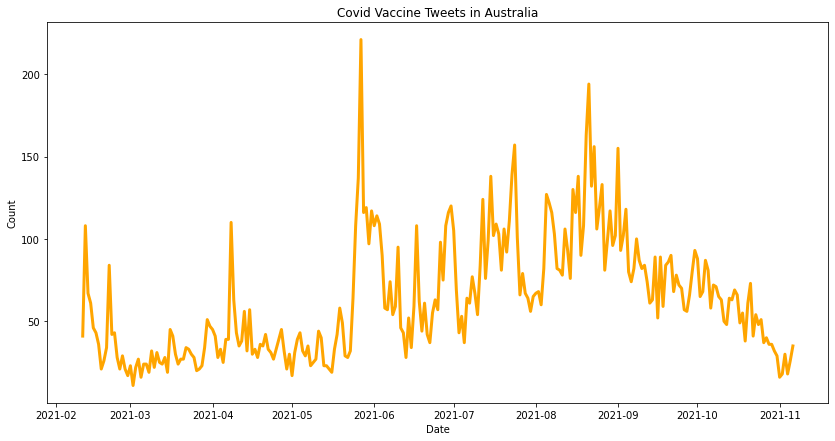

In [ ]:
# Create new variable 'tweetcount' to count tweets per date
tweetcount = tweetsdf.groupby(['Date'])['Date'].count()
#Convert to dataframe
tweetcount = pd.DataFrame(tweetcount)

#Visualize as time series chart
plt.plot(tweetcount.Date, linewidth=3, color = "orange")
plt.title('Covid Vaccine Tweets in Australia')
plt.xlabel('Date')
plt.ylabel('Count')

In [ ]:
# Token count per tweet as tweet length, summary statistics using describe
tweetsdf['Tweet Length'] = tweetsdf['cleantweet'].str.split().map(len)
tweetsdf['Tweet Length'].describe()

count    16991.000000
mean        15.525160
std          7.364355
min          0.000000
25%          9.000000
50%         15.000000
75%         21.000000
max         42.000000
Name: Tweet Length, dtype: float64

In [ ]:
# Token count per headline, summary statistics using describe
headlines['Token Count'] = headlines['Clean Headline'].str.split().map(len)
headlines['Token Count'].describe()


count    66.000000
mean      8.090909
std       2.223838
min       3.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      13.000000
Name: Token Count, dtype: float64

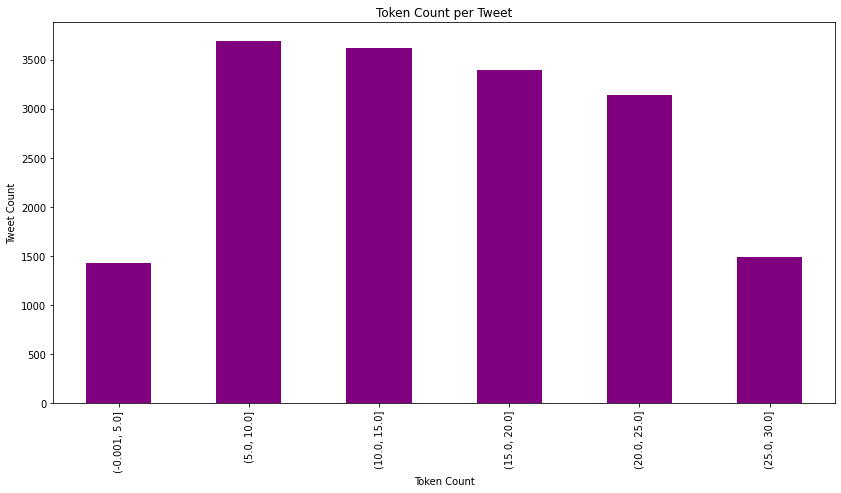

In [ ]:
# Create bar chart for token count per tweet
tweetsdf['Tweet Length'].value_counts(sort=False, bins=range(0,35,5)).plot.bar(color = 'purple')
plt.title("Token Count per Tweet")
plt.ylabel("Tweet Count")
plt.xlabel("Token Count")
plt.show()

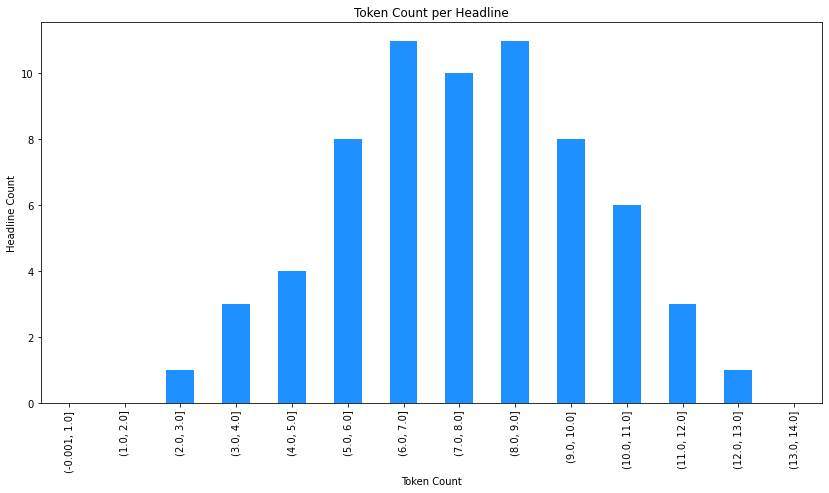

In [ ]:
# Create bar chart for token count per headline
headlines['Token Count'].value_counts(sort=False, bins=range(0,15,1)).plot.bar(color = 'dodgerblue')
plt.title("Token Count per Headline")
plt.ylabel("Headline Count")
plt.xlabel("Token Count")
plt.show()


3. Sentiment Analysis


In [ ]:
# Initate Vader Sentiment analyzer as SID
SID = SentimentIntensityAnalyzer()
# Apply sentiment analyser to tweets and headlines as new variable 'sentiment score'
tweetsdf['Sentiment Scores'] = tweetsdf['cleantweet'].apply(lambda x: SID.polarity_scores(x))
headlines['Sentiment Scores'] = headlines['Clean Headline'].apply(lambda x: SID.polarity_scores(x))

In [ ]:
# Create new variable compound score, extracting the compound sentiment score from sentiment score
tweetsdf['compound']  = tweetsdf['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
headlines['compound'] = headlines['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])


In [ ]:
# Convert compound score to positive, negative or neutral based on compound value for tweets
tweetsdf['Sentiment'] = tweetsdf['compound']
for i in range(len(tweetsdf['Sentiment'])):
  if tweetsdf['Sentiment'][i] < 0:
    tweetsdf['Sentiment'][i] = 'Negative'
  elif tweetsdf['Sentiment'][i] > 0:
    tweetsdf['Sentiment'][i] = 'Positive'
  else:
    tweetsdf['Sentiment'][i] = 'Neutral'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Convert compound score to positive, negative or neutral based on compound value for tweets
headlines['Sentiment'] = headlines['compound']
for i in range(len(headlines['Sentiment'])):
  if headlines['Sentiment'][i] < 0:
    headlines['Sentiment'][i] = 'Negative'
  elif headlines['Sentiment'][i] > 0:
    headlines['Sentiment'][i] = 'Positive'
  else:
    headlines['Sentiment'][i] = 'Neutral'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Sentiment of Covid Vaccine Tweets')

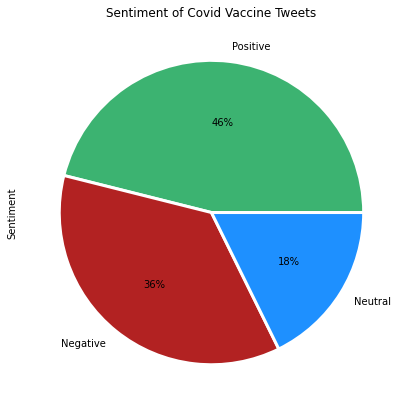

In [ ]:
# Visualize sentiment proportion for tweets as pie chart, customer colors as 'colors'
colors = ['mediumseagreen', 'firebrick', 'dodgerblue']
tweetsdf['Sentiment'].value_counts().plot(kind='pie',  autopct='%1.0f%%', colors = colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Sentiment of Covid Vaccine Tweets")

Text(0.5, 1.0, 'Sentiment of Covid News Headlines')

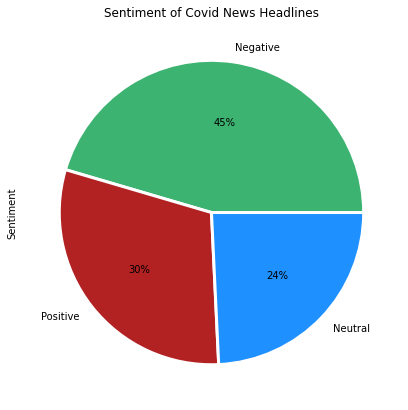

In [ ]:
# Visualize sentiment proportion for headlines as pie chart
colors = ['mediumseagreen', 'firebrick', 'dodgerblue']
headlines['Sentiment'].value_counts().plot(kind='pie',  autopct='%1.0f%%', colors = colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Sentiment of Covid News Headlines")

In [ ]:
# Convert to cross tab for count of sentiments per date as tweets_sentiment
tweets_sentiment = pd.crosstab(tweetsdf['Date'], tweetsdf['Sentiment'])


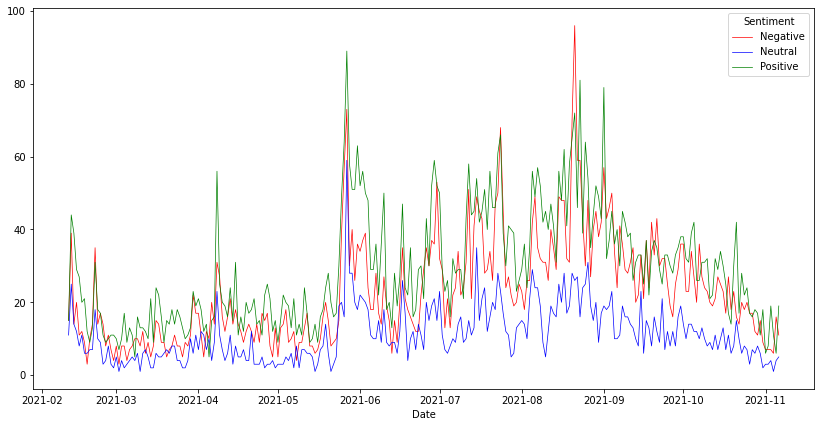

In [ ]:
# Visualize sentiment count as time series chart
tweets_sentiment.plot(kind = 'line', color = ('red', 'blue', 'green'), linewidth = 0.7)

In [ ]:
# Create crosstab for sentiment proportions per day as sentiment_proportion
sentiment_proportion = pd.crosstab(tweetsdf['Date'], tweetsdf['Sentiment'], normalize='index')

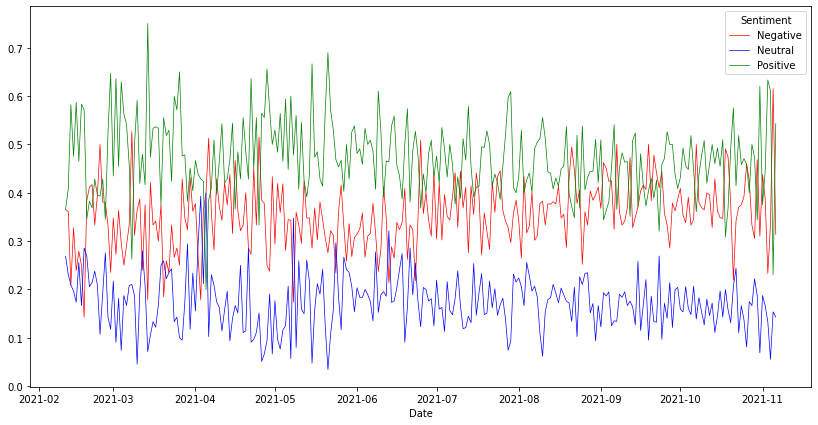

In [ ]:
# Visualize sentiment proportion as time series chart
sentiment_proportion.plot(kind = 'line', color = ('red', 'blue', 'green'), linewidth = 0.7)

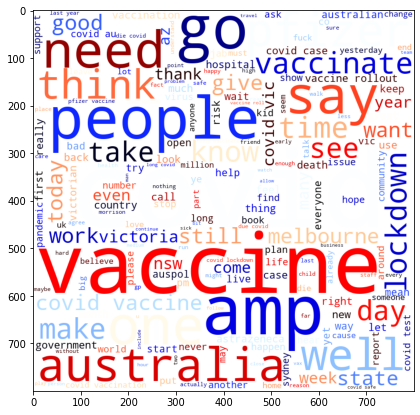

In [ ]:
# Create wordcloud for all tokens in tweets
wordcloud = WordCloud(width = 800, height = 800, max_words = 200, colormap = 'flag', background_color ='white', min_font_size = 10).generate(' '.join(tweetsdf['cleantweet']))
plt.imshow(wordcloud)

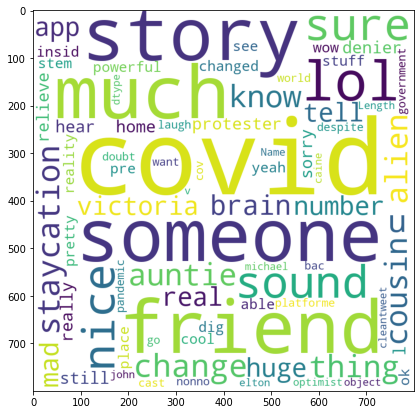

In [ ]:
# Create wordcloud for positive tweets, GREEN
positive_tweets = tweetsdf['cleantweet'][tweetsdf["Sentiment"] == 'Positive']
positive_wordcloud = WordCloud(width = 800, height = 800, max_words = 200, background_color ='white', min_font_size = 10).generate(str(positive_tweets))
plt.imshow(positive_wordcloud)

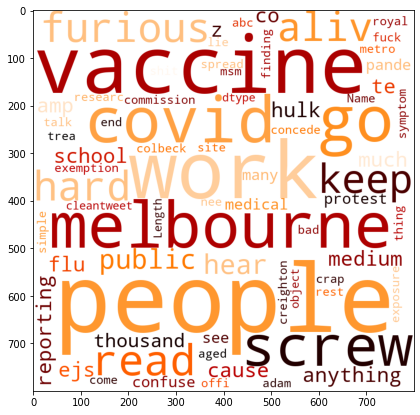

In [ ]:
# Create wordcloud for negative tweets, RED
negative_tweets = tweetsdf['cleantweet'][tweetsdf["Sentiment"] == 'Negative']
negative_wordcloud =  WordCloud(width = 800, height = 800, max_words = 200, colormap = 'gist_heat', background_color ='white', min_font_size = 10).generate(str(negative_tweets))
plt.imshow(negative_wordcloud)

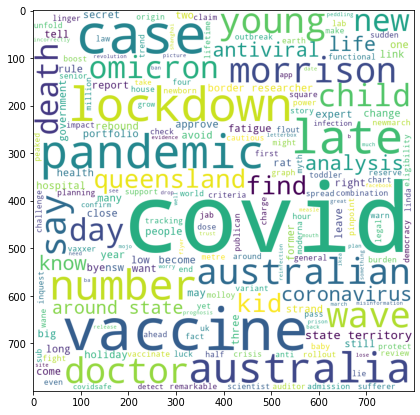

In [ ]:
# Create wordcloud for news headlines
wc_headlines = headlines['Clean Headline']
wordcloud = WordCloud(width = 800, height = 800, max_words = 200, background_color ='white', min_font_size = 10).generate(' '.join(headlines['Clean Headline']))
plt.imshow(wordcloud)

In [ ]:
# Use label encoder to convert tweets sentiment to numerical value [0:2]
le = LabelEncoder()
label = le.fit_transform(tweetsdf['Sentiment'])
tweetsdf['Sentiment Label'] = le.fit_transform(tweetsdf['Sentiment'])


In [ ]:
# Use label encoder to convert headline sentiment to numerical value [0:2]
label = le.fit_transform(headlines['Sentiment'])
headlines['Sentiment Label'] = le.fit_transform(headlines['Sentiment'])


4.  Machine Learning

In [ ]:
# Create x and y variables for training machine learning model
x = tweetsdf['cleantweet']
y = tweetsdf['Sentiment Label']

# Create train/test split as x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
print("X Training shape: {}".format(x_train.shape))
print("X Testing shape: {}".format(x_test.shape))
print("Y Training shape: {}".format(y_train.shape))
print("Y Testing shape: {}".format(y_test.shape))


X Training shape: (11893,)
X Testing shape: (5098,)
Y Training shape: (11893,)
Y Testing shape: (5098,)


In [ ]:
# Vectorize for training model
# Initial tdidf vectorizer as tfidf
vectorizer = TfidfVectorizer(min_df = 2,max_df = 0.9,sublinear_tf = True, use_idf = True, stop_words='english')

# Vectorize training and testing set
x_trainvec = vectorizer.fit_transform(x_train)
x_testvec = vectorizer.transform(x_test)

# Vectorize training and testing set for headlines
news_x = vectorizer.transform(headlines['Clean Headline'])
news_y = headlines['Sentiment Label']

In [ ]:
# Initiate SVM model
classifier_svm = svm.SVC()

# Fit model to training data
classifier_svm.fit(x_trainvec, y_train)

# Make prediction on testing data
prediction_svm = classifier_svm.predict(x_testvec)

#Inspect classification report
reportsvm = classification_report(y_test, prediction_svm, output_dict=True)
reportsvm

{'0': {'precision': 0.8135689851767389,
  'recall': 0.7717685235262304,
  'f1-score': 0.7921176797113516,
  'support': 1849},
 '1': {'precision': 0.7989864864864865,
  'recall': 0.49580712788259956,
  'f1-score': 0.6119016817593791,
  'support': 954},
 '2': {'precision': 0.7354651162790697,
  'recall': 0.881917211328976,
  'f1-score': 0.8020606300772737,
  'support': 2295},
 'accuracy': 0.7697136131816399,
 'macro avg': {'precision': 0.7826735293140983,
  'recall': 0.716497620912602,
  'f1-score': 0.7353599971826682,
  'support': 5098},
 'weighted avg': {'precision': 0.7756796005414601,
  'recall': 0.7697136131816399,
  'f1-score': 0.762869544961177,
  'support': 5098}}

In [ ]:
# Tune kernel of SVM model with gridsearch
param_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Call gridsearch, use F1 score for weighting, apply cross-validation
gridsvm = GridSearchCV(classifier_svm, param_svm, refit = True, return_train_score = True, cv = 5, verbose = 10, scoring = 'f1_weighted')

# fitting the model for grid search
gridsvm.fit(x_trainvec, y_train)

# print best parameter after tuning
print(gridsvm.best_params_)
grid_predictions = gridsvm.predict(x_testvec)

# print classification report
print(classification_report(y_test, grid_predictions))
finalsvm = gridsvm.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START kernel=linear...............................................
[CV 1/5; 1/4] END kernel=linear;, score=(train=0.939, test=0.783) total time=  11.6s
[CV 2/5; 1/4] START kernel=linear...............................................
[CV 2/5; 1/4] END kernel=linear;, score=(train=0.941, test=0.782) total time=  11.6s
[CV 3/5; 1/4] START kernel=linear...............................................
[CV 3/5; 1/4] END kernel=linear;, score=(train=0.942, test=0.792) total time=  11.7s
[CV 4/5; 1/4] START kernel=linear...............................................
[CV 4/5; 1/4] END kernel=linear;, score=(train=0.942, test=0.783) total time=  11.8s
[CV 5/5; 1/4] START kernel=linear...............................................
[CV 5/5; 1/4] END kernel=linear;, score=(train=0.943, test=0.778) total time=  11.7s
[CV 1/5; 2/4] START kernel=poly.................................................
[CV 1/5; 2/4] END kernel=poly

In [ ]:
# Tune C, Gamma using sigmoid kernel
param_svm2 = {'C': [1,3,5,7],
              'gamma': [0.01, 0.1, 1,10],
              'kernel': ['sigmoid']}

gridsvm2 = GridSearchCV(classifier_svm, param_svm2, refit = True, return_train_score = True, cv = 5, verbose = 10, scoring = 'f1_weighted')

# Fit the model with tuning hyper-paramters
gridsvm2.fit(x_trainvec, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START C=1, gamma=0.01, kernel=sigmoid............................
[CV 1/5; 1/16] END C=1, gamma=0.01, kernel=sigmoid;, score=(train=0.296, test=0.296) total time=  16.2s
[CV 2/5; 1/16] START C=1, gamma=0.01, kernel=sigmoid............................
[CV 2/5; 1/16] END C=1, gamma=0.01, kernel=sigmoid;, score=(train=0.296, test=0.296) total time=  16.2s
[CV 3/5; 1/16] START C=1, gamma=0.01, kernel=sigmoid............................
[CV 3/5; 1/16] END C=1, gamma=0.01, kernel=sigmoid;, score=(train=0.296, test=0.296) total time=  16.3s
[CV 4/5; 1/16] START C=1, gamma=0.01, kernel=sigmoid............................
[CV 4/5; 1/16] END C=1, gamma=0.01, kernel=sigmoid;, score=(train=0.296, test=0.296) total time=  16.3s
[CV 5/5; 1/16] START C=1, gamma=0.01, kernel=sigmoid............................
[CV 5/5; 1/16] END C=1, gamma=0.01, kernel=sigmoid;, score=(train=0.296, test=0.296) total time=  16.4s
[CV 1/5; 2/16]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['sigmoid']},
             return_train_score=True, scoring='f1_weighted', verbose=10)

In [ ]:
# Print the optimal hyper-parameters from tuning
print(gridsvm2.best_params_)
# Make prediction using best hyper-parameters on testing set
svm_pred = gridsvm2.predict(x_testvec)

# print classification report
print(classification_report(y_test, svm_pred))
finalsvm = gridsvm2.best_estimator_
finalsvm

{'C': 3, 'gamma': 1, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1849
           1       0.72      0.75      0.73       954
           2       0.83      0.83      0.83      2295

    accuracy                           0.80      5098
   macro avg       0.79      0.79      0.79      5098
weighted avg       0.80      0.80      0.80      5098



SVC(C=3, gamma=1, kernel='sigmoid')

In [ ]:
# Assess final model for prediction on training data set
svm_predtrain = finalsvm.predict(x_trainvec)

# print classification report
print(classification_report(y_train, svm_predtrain))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4304
           1       0.85      0.84      0.84      2054
           2       0.89      0.89      0.89      5535

    accuracy                           0.88     11893
   macro avg       0.87      0.87      0.87     11893
weighted avg       0.88      0.88      0.88     11893



In [ ]:
# Convert top 10 hyper-parameters to data frame for viewing
svm_results = pd.DataFrame(gridsvm2.cv_results_)
svm_results_final = svm_results[(svm_results['rank_test_score'] < 10)]
svm_results_final = svm_results_final.sort_values('rank_test_score')
svm_results_final = svm_results_final[['param_C', 'param_gamma', 'param_kernel', 'mean_train_score', 'mean_test_score' ]]
svm_results_final.columns = ['C', 'Gamma', 'Kernel', 'F1 - Validation', 'F1 - Test']
svm_results_final

,C,Gamma,Kernel,F1 - Validation,F1 - Test
6,3,1,sigmoid,0.886930,0.788565
10,5,1,sigmoid,0.876301,0.784188
2,1,1,sigmoid,0.880627,0.777266
14,7,1,sigmoid,0.868182,0.776452
13,7,0.1,sigmoid,0.920533,0.772942
9,5,0.1,sigmoid,0.891448,0.754730
5,3,0.1,sigmoid,0.801880,0.703002
3,1,10,sigmoid,0.519439,0.654323
15,7,10,sigmoid,0.541413,0.646070


In [ ]:
# Define function to plot confusion matrix as a heatmap

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual')
    plt.xlabel('Predictied')
    plt.tight_layout()

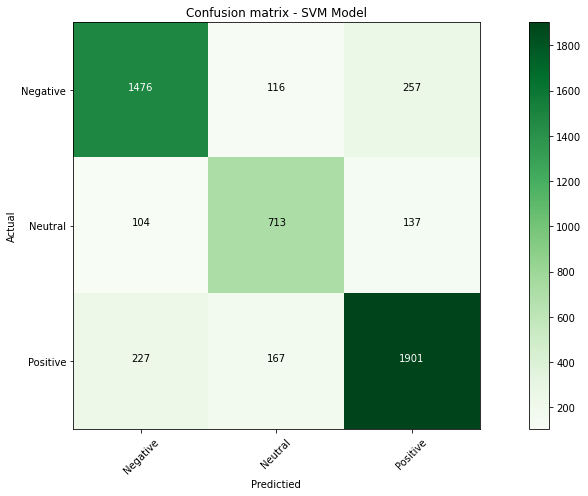

In [ ]:
# Visualize heat map of confusion matrix
SVM_matrix = confusion_matrix(y_test, svm_pred)
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['Negative', 'Neutral', 'Positive'],
                      title='Confusion matrix - SVM Model')

In [ ]:
# Make prediction of News headlines using final SVM Model
svm_news_pred = finalsvm.predict(news_x)
print(classification_report(news_y, svm_news_pred))


              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.75      0.38      0.50        16
           2       0.65      0.85      0.74        20

    accuracy                           0.70        66
   macro avg       0.71      0.66      0.66        66
weighted avg       0.71      0.70      0.68        66



In [ ]:
# Pickle model for future use
with open('model_pkl_svm', 'wb') as files:
    pickle.dump(finalsvm, files)

Confusion matrix, without normalization
[[23  2  5]
 [ 6  6  4]
 [ 3  0 17]]


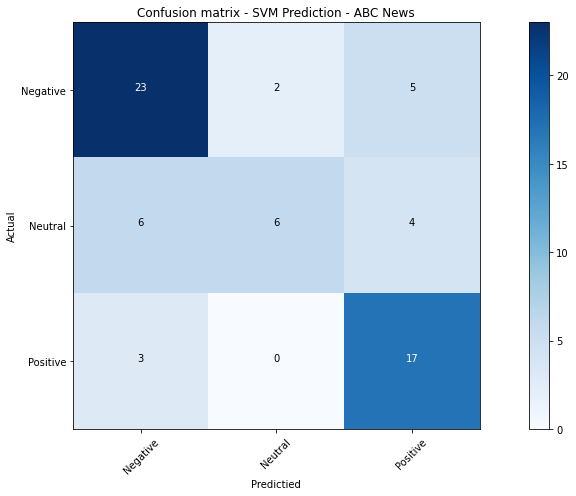

In [ ]:
# Plot heat map of confusuion matrix for SVM on news headlines
NB_matrix = confusion_matrix(news_y, svm_news_pred)
plt.figure()
plot_confusion_matrix(NB_matrix, classes=['Negative', 'Neutral', 'Positive'],
                      title='Confusion matrix - SVM Prediction - ABC News')

In [ ]:
# Define initial XGB Model
xgbmodel = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    n_jobs = -1,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0.1,
                    objective='multi:softmax',
                    num_class=3,
                    seed=1000)

# Fit XGB Model to training data
xgbmodel.fit(x_trainvec, y_train)

# Predict testing data using XGB Model
xgb.predict = xgbmodel.predict(x_testvec)

In [ ]:
# Print classification report of prediction on testing set
reportxgb = classification_report(y_test, xgb.predict, output_dict=True)
reportxgb

{'0': {'precision': 0.8651477832512315,
  'recall': 0.7598702001081665,
  'f1-score': 0.8090987618773394,
  'support': 1849},
 '1': {'precision': 0.7185792349726776,
  'recall': 0.8270440251572327,
  'f1-score': 0.7690058479532162,
  'support': 954},
 '2': {'precision': 0.8127104377104377,
  'recall': 0.8413943355119826,
  'f1-score': 0.8268036822950118,
  'support': 2295},
 'accuracy': 0.8091408395449196,
 'macro avg': {'precision': 0.798812485311449,
  'recall': 0.8094361869257941,
  'f1-score': 0.801636097375189,
  'support': 5098},
 'weighted avg': {'precision': 0.8141140243116746,
  'recall': 0.8091408395449196,
  'f1-score': 0.8095664261525345,
  'support': 5098}}

In [ ]:
# Define parameters for XGB tuning
xgbparams = {
    'max_depth': [3,5,7],
    'n_estimators': [100, 1000],
    'learning_rate' : [0.01, 0.1],
    'colsample_bytree': [0.3, 0.7]

}
# Tune model using gride search, 5 fold cross validation
xgbtune1 = GridSearchCV(estimator = xgbmodel, param_grid = xgbparams,verbose = 5, return_train_score = True, refit = True)
xgbtune1.fit(x_trainvec, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=(train=0.564, test=0.546) total time=   1.3s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=(train=0.560, test=0.555) total time=   1.3s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=(train=0.560, test=0.555) total time=   1.3s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=(train=0.558, test=0.560) total time=   1.3s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=(train=0.565, test=0.545) total time=   1.2s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=(train=0.674, test=0.639) total time=  11.9s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=(train=0.672, t

GridSearchCV(estimator=XGBClassifier(gamma=0.1, max_depth=5, n_estimators=1000,
                                     n_jobs=-1, num_class=3,
                                     objective='multi:softprob', seed=1000),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 1000]},
             return_train_score=True, verbose=5)

In [ ]:
# Print best parameters for first tune of XGB Model
print(xgbtune1.best_params_)

# Make prediction using tuned xgb on testing
grid_predictions = xgbtune1.predict(x_testvec)
print(classification_report(y_test, grid_predictions))


{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1849
           1       0.73      0.83      0.78       954
           2       0.82      0.85      0.84      2295

    accuracy                           0.82      5098
   macro avg       0.81      0.82      0.81      5098
weighted avg       0.82      0.82      0.82      5098



In [ ]:
# Declare second round of tuning parameters for XGB
xgbparams2 =  {
    'max_depth': [7],
    'n_estimators': [1000, 1100],
    'learning_rate' : [0.1],
    'colsample_bytree': [0.3],
     'min_child_weight': [1,2,3],
     'gamma': [0,0.1]

}
# Tune model
xgbtune2 = GridSearchCV(estimator = xgbmodel, param_grid = xgbparams2,verbose = 10, return_train_score = True, refit = True)
xgbtune2.fit(x_trainvec, y_train)


In [ ]:
# Assess tuning model best parameters
xgbtune2.best_params_


{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 1100}

In [ ]:
# Make prediction using tuned xgbmodel iteration 2
grid_predictions2 = xgbtune2.predict(x_testvec)
print(classification_report(y_test, grid_predictions2))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1849
           1       0.74      0.84      0.78       954
           2       0.83      0.85      0.84      2295

    accuracy                           0.82      5098
   macro avg       0.81      0.82      0.81      5098
weighted avg       0.82      0.82      0.82      5098



In [ ]:
# Declare final XGB model
finalxgb = xgbtune2.best_estimator_

# Predict testing data set on final model
gnb_pred = finalxgb.predict(x_testvec)

# print classification report
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1849
           1       0.74      0.84      0.78       954
           2       0.83      0.85      0.84      2295

    accuracy                           0.82      5098
   macro avg       0.81      0.82      0.81      5098
weighted avg       0.82      0.82      0.82      5098

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.61      0.88      0.72        16
           2       0.75      0.75      0.75        20

    accuracy                           0.74        66
   macro avg       0.74      0.76      0.74        66
weighted avg       0.77      0.74      0.74        66



In [ ]:
# Assess model prediction on trainig data set
gnb_pred_train = finalxgb.predict(x_trainvec)
# print classification report
print(classification_report(y_train, gnb_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4304
           1       0.89      0.99      0.94      2054
           2       0.98      0.97      0.97      5535

    accuracy                           0.97     11893
   macro avg       0.95      0.97      0.96     11893
weighted avg       0.97      0.97      0.97     11893



In [ ]:
# Make predicting using xgb model on news headlines
xgb_news_pred = finalxgb.predict(news_x)
# Print classification report
print(classification_report(news_y, xgb_news_pred))


              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.61      0.88      0.72        16
           2       0.75      0.75      0.75        20

    accuracy                           0.74        66
   macro avg       0.74      0.76      0.74        66
weighted avg       0.77      0.74      0.74        66



Confusion matrix, without normalization
[[1429  129  291]
 [  45  800  109]
 [ 193  158 1944]]


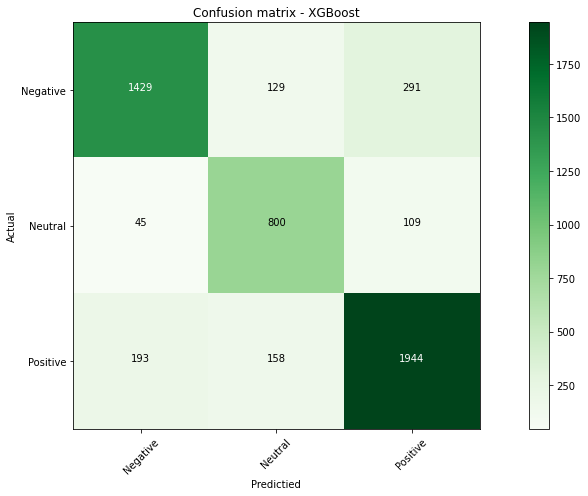

In [ ]:
# Visualize heatmap of testing set
xgb_matrix = confusion_matrix(y_test, gnb_pred)
plt.figure()
plot_confusion_matrix(xgb_matrix, classes=['Negative', 'Neutral', 'Positive'],
                      title='Confusion matrix - XGBoost')

Confusion matrix, without normalization
[[20  6  4]
 [ 1 14  1]
 [ 2  3 15]]


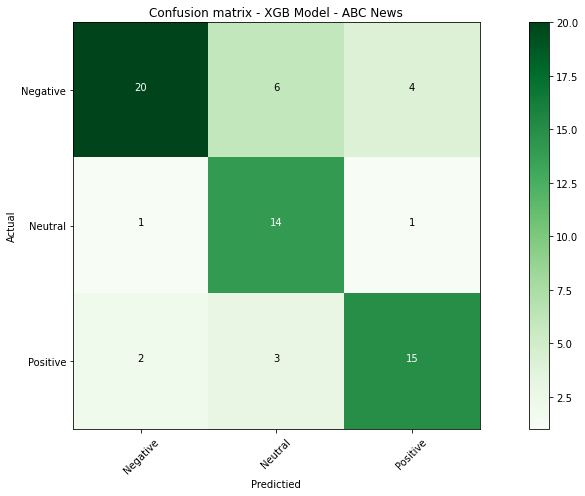

In [ ]:
# Visualize heatmap of news set
xgb_news_matrix = confusion_matrix(news_y, xgb_news_pred)
plt.figure()
plot_confusion_matrix(xgb_news_matrix, classes=['Negative', 'Neutral', 'Positive'],
                      title='Confusion matrix - XGB Model - ABC News')